# 16장 이미지 인식의 꽃, 컨볼루션 뉴럴 네트워크(CNN)

## 2. 딥러닝 기본 프레임 만들기 

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

# MNIST 데이터를 불러옵니다. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#차원 변환 후, 테스트셋과 학습셋으로 나누어 줍니다.
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [3]:
# 모델 실행 환경을 설정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정구간입니다.
MODEL_DIR = '../data/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="../data/model/MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))



Epoch 00001: val_loss improved from inf to 0.18349, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 00002: val_loss improved from 0.18349 to 0.13414, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 00003: val_loss improved from 0.13414 to 0.11206, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 00004: val_loss improved from 0.11206 to 0.09556, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 00005: val_loss improved from 0.09556 to 0.08965, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 00006: val_loss improved from 0.08965 to 0.08774, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 00007: val_loss improved from 0.08774 to 0.08218, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 00008: val_loss did not improve from 0.08218

Epoch 00009: val_loss improved from 0.08218 to 0.07998, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 00010: val_loss improved from 0.07998 to 0.07940, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 00011: val_loss did not imp

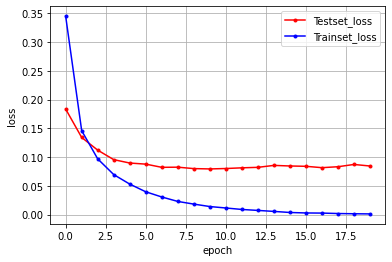

In [4]:
# 검증셋과 학습셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()